# imports

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import sys
sys.path.append('/mnt/home/cmodi/.local/lib/python3.8/site-packages/')

In [3]:
import sys, os
sys.path.append('../src/')

import loader_pk
import sbitools, sbiplots

In [4]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#  Sub boxes

In [9]:
from nbodykit.lab import FFTPower, ArrayMesh

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [10]:
f = np.load('/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/0000/field.npy')
print(f.mean())

63.99999999999987


In [11]:
# del x0, x1, y0, y1, z0, z1

0 128 0 128 0 128
63.06212987101891
0 128 0 128 128 256
65.00067407339789
0 128 128 256 0 128
64.29900737171923
0 128 128 256 128 256
65.15284759243896
128 256 0 128 0 128
64.55852873410555
128 256 0 128 128 256
62.849306760790085
128 256 128 256 0 128
65.93856932256469
128 256 128 256 128 256
61.138936273964674


[]

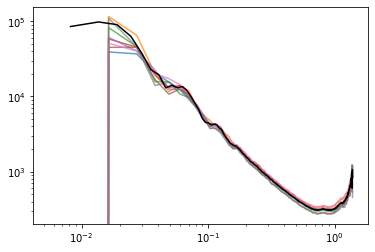

In [12]:
sys.path.append('../../galmodel/code/utils/')
import tools

kfull, pfull = tools.power(f/f.mean(), boxsize=1000)


# x0, x1 = 0, 128
# y0, y1 = 0, 128
# z0, z1 = 0, 128
fac = 2
nc = 256 // fac 
psubs = []
psubsnb = []
for i in range(fac):
    x0, x1 = nc*i, nc*(i+1)
    
    for j in range(fac):
        y0, y1 = nc*j, nc*(j+1)
    
        for ik in range(fac):
            z0, z1 = nc*ik, nc*(ik+1)            
            
            print(x0, x1, y0, y1, z0, z1)
            sub = f[x0:x1, y0:y1, z0:z1]
            box = sub*1.
            print(box.mean())
            ksub, psub = tools.power(box/box.mean(), boxsize=1000/fac)
            mesh = ArrayMesh(box/box.mean(), BoxSize=1000/fac)
            pk = FFTPower(mesh, mode='1d', dk=2*np.pi/1000, kmin=2*np.pi/1000*fac ).power
            psubsnb.append(pk['power'])
            plt.plot(ksub, psub, alpha=0.7)
            psubs.append(psub)

plt.plot(kfull[1:], pfull[1:], 'k')

plt.loglog()


In [ ]:
# nmodes = 4* pi * k[1:]**2 * np.diff(k) * bs **3 /(2*pi)**3  * 2 #/ bs**3 
# var = 2*np.interp(k[1:], khfit, pkhfit)**2 / nmodes
# err = var**0.5
# plt.plot(err)

# # plt.plot(k0, p0/np.interp(k, ktest, pkhfit))
# # plt.plot(k, p1/np.interp(k, ktest, pkhfit))
# erry = err/np.interp(k[1:], khfit, pkhfit)
# pden = lambda k : np.interp(k, khfit, pkhfit)


/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'P$_{sub-vol: 500 Mpc/h}$(k)/P$_{full: 1 Gpc/h}$(k)')

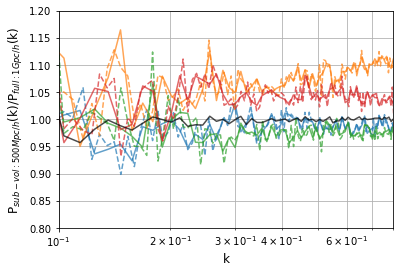

In [13]:
# nmodes_sub = 4* pi * k[1:]**2 * np.diff(k) * (bs/fac) **3 /(2*pi)**3  * 2 #/ bs**3 
# var_sub = 2*np.interp(k[1:], kfull, pfull)**2 / nmodes_sub
# err_sub = var_sub**0.5
# err_sub /= np.interp(ksub[1:], kfull, pfull)

# for i in range(fac**3):
for i in range(4):
    # plt.errorbar(ksub[1:], psub[1:]/np.interp(ksub[1:], kfull, pfull), err_sub, alpha=0.7)
    plt.errorbar(ksub[1:], psubs[i][1:]/np.interp(ksub[1:], kfull, pfull), color=f'C{i}', alpha=0.7)
    plt.errorbar(pk['k'][1:], psubsnb[i][1:]/np.interp(pk['k'][1:], kfull, pfull), color=f'C{i}', alpha=0.7, ls='--')

plt.errorbar(ksub, np.array(psubs).mean(axis=0)/np.interp(ksub, kfull, pfull),  color='k', alpha=0.7)
# plt.plot(ksub, psub2/np.interp(ksub, kfull, pfull))
plt.semilogx()
plt.grid(which='both')
plt.ylim(0.8, 1.2)
plt.xlim(0.1, 0.8) 

plt.xlabel('k', fontsize=12)
plt.ylabel('P$_{sub-vol: 500 Mpc/h}$(k)/P$_{full: 1 Gpc/h}$(k)', fontsize=12)

/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[]

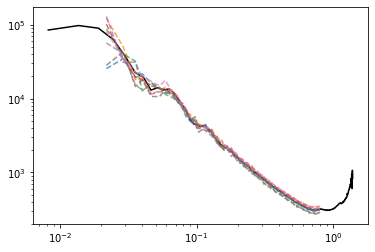

In [14]:
# for i in range(fac**3):
plt.plot(kfull[1:], pfull[1:], 'k-')
for i in range(8):
    # plt.errorbar(ksub[1:], psub[1:]/np.interp(ksub[1:], kfull, pfull), err_sub, alpha=0.7)
    # plt.errorbar(ksub[1:], psubs[i][1:], color=f'C{i}', alpha=0.7)
    plt.errorbar(pk['k'][1:], psubsnb[i][1:], color=f'C{i}', alpha=0.7, ls='--')
plt.loglog()

In [15]:
# # WITH ZERO PADDING
# psubs2 = []
# for i in range(2):
#     x0, x1 = nc*i, nc*(i+1)
    
#     for j in range(2):
#         y0, y1 = nc*j, nc*(j+1)
    
#         for ik in range(2):
#             z0, z1 = nc*ik, nc*(ik+1)            
            
#             print(x0, x1, y0, y1, z0, z1)
#             sub = f[x0:x1, y0:y1, z0:z1]
#             box = np.zeros([nc*3, nc*3, nc*3])
#             box[nc:2*nc, nc:2*nc, nc:2*nc] = sub
#             ksub2, psub2 = tools.power(box, boxsize=1000/fac*3)
#             psub2 /= (3)**3
#             plt.plot(ksub2, psub2, alpha=0.7)
#             psubs2.append(psub2)

# plt.plot(kfull[1:], pfull[1:], 'k')

# plt.loglog()
# plt.show()

# for psub2 in psubs2[:8]:
#     plt.errorbar(ksub2[1:], psub2[1:]/np.interp(ksub2[1:], kfull, pfull), alpha=0.7)

# plt.errorbar(ksub, np.array(psubs).mean(axis=0)/np.interp(ksub, kfull, pfull),  color='k', alpha=0.7)
# # plt.plot(ksub, psub2/np.interp(ksub, kfull, pfull))
# plt.semilogx()
# plt.grid(which='both')
# plt.ylim(0.8, 1.2)
# plt.xlim(0.1, 0.8) 

# plt.xlabel('k', fontsize=12)
# plt.ylabel('P$_{sub-vol: 500 Mpc/h}$(k)/P$_{full: 1 Gpc/h}$(k)', fontsize=12)

## loop over LH

In [17]:
def get_pksubs(f, fac=2, zeropad = False):

    nc = f.shape[0] // fac 
    psubs = []
    for i in range(fac):
        x0, x1 = nc*i, nc*(i+1)

        for j in range(fac):
            y0, y1 = nc*j, nc*(j+1)

            for ik in range(fac):
                z0, z1 = nc*ik, nc*(ik+1)            

            
                sub = f[x0:x1, y0:y1, z0:z1]
                if zeropad:
                    box = np.zeros([nc*3, nc*3, nc*3])
                    box[nc:2*nc, nc:2*nc, nc:2*nc] = sub
                    ksub2, psub2 = tools.power(box, boxsize=1000/fac*3)
                    psub2 /= (3)**3
                else:
                    box = sub*1.
                    mesh = ArrayMesh(box/box.mean(), BoxSize=1000/fac)
                    pk = FFTPower(mesh, mode='1d', dk=2*np.pi/1000, kmin=2*np.pi/1000*fac ).power
                psubs.append(pk['power'])
    psubs = np.array(psubs)
    return pk['k'], psubs


# fac = 4
# for i in range(2000):
#     if (i%50 == 0):print(i)
#     f = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/{i:04d}/field.npy')
#     ksubs, psubs = get_pksubs(f, fac=fac)
#     # print(psubs.shape)
#     np.save(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/{i:04d}/power_split{fac}.npy', psubs)
#     np.save(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256//k_split{fac}.npy', ksubs)


[]

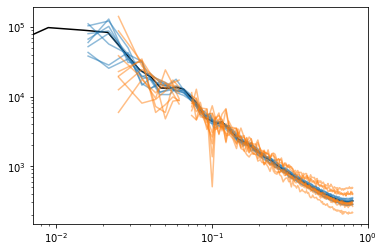

In [23]:
p0 = np.load('/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/0000/power.npy')
k, p0 = p0.T
p1 = np.load('/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/0000/power_split2.npy').real
p2 = np.load('/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/0000/power_split4.npy').real
k1 = np.load('/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/k_split2.npy')
k2 = np.load('/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/k_split4.npy')
#
plt.plot(k, p0, 'k-')
for i in range(8):
    plt.plot(k1, p1[i], 'C0', alpha=0.5)
plt.loglog()
for i in range(8):
    plt.plot(k2, p2[i], 'C1', alpha=0.5)
plt.loglog()


(0.0, 2.0)

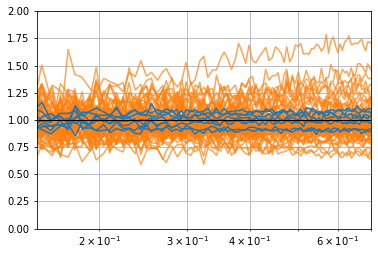

In [25]:
plt.plot(k2, (p2/np.interp(k2, k, p0)).T, 'C1', alpha=0.7)
plt.plot(k1, (p1/np.interp(k1, k, p0)).T, 'C0')
plt.semilogx()
plt.axhline(1, color='k', lw=1)
plt.grid(which='both')
plt.xlim(0.15, 0.7)
plt.ylim(0, 2)

### combine

In [14]:

fac = 2
pk = []
for i in range(2000):
    if (i%100 == 0):print(i)
    pk.append(np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/{i:04d}/power_split{fac}.npy'))

pk = np.array(pk)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [15]:
print(pk.shape)

(2000, 8, 126)


In [16]:
# np.save(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256//power_split{fac}.npy', pk.real)

# np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256//power_split2.npy').shape


# check loader

In [13]:
sys.path.append('../src/')
import sbitools
import loader_pk_splits as loader
import yaml
import loader_pk, loader_hybrid

In [6]:
cfgd_dict = yaml.load(open('../scripts/snle/config_pk_splits.yaml'), Loader=yaml.Loader)
args = {}
for i in cfgd_dict.keys():
    args.update(**cfgd_dict[i])
cfgd = sbitools.Objectify(**args)



In [12]:
kcut, features, params = loader.loader(cfgd, return_k=True)

Loaded power spectrum data with shape :  (2000, 1, 124)
now process
pk shape after k-cuts :  (2000, 1, 56)


In [116]:
features.shape, params.shape

((2000, 4, 56), (2000, 4, 6))

In [117]:
params[0:2]

array([[[1.75500000e-01, 6.68100000e-02, 7.73700000e-01, 8.84900000e-01,
         6.64100000e-01, 5.79833437e+04],
        [1.75500000e-01, 6.68100000e-02, 7.73700000e-01, 8.84900000e-01,
         6.64100000e-01, 5.39041594e+04],
        [1.75500000e-01, 6.68100000e-02, 7.73700000e-01, 8.84900000e-01,
         6.64100000e-01, 7.02360373e+04],
        [1.75500000e-01, 6.68100000e-02, 7.73700000e-01, 8.84900000e-01,
         6.64100000e-01, 3.09368460e+04]],

       [[2.13900000e-01, 5.55700000e-02, 8.59900000e-01, 9.78500000e-01,
         8.61900000e-01, 6.13030029e+04],
        [2.13900000e-01, 5.55700000e-02, 8.59900000e-01, 9.78500000e-01,
         8.61900000e-01, 3.05661853e+04],
        [2.13900000e-01, 5.55700000e-02, 8.59900000e-01, 9.78500000e-01,
         8.61900000e-01, 4.80309851e+04],
        [2.13900000e-01, 5.55700000e-02, 8.59900000e-01, 9.78500000e-01,
         8.61900000e-01, 7.70060889e+04]]])

In [118]:
data = sbitools.test_train_split(features, params, train_size_frac=0.85)

Loading test-train split index from /mnt/ceph/users/cmodi/contrastive/analysis/test-train-splits/train-N2000-f0.15-S0.npy
Successfully loaded


In [119]:
data.trainx.shape

(6800, 56)

### hybrid

In [56]:
sys.path.append('../src/')
import sbitools
# import loader_pk_splits as loader
import yaml
import loader_hybrid

In [63]:
cfgd_dict = yaml.load(open('../scripts/hybrid/config_pk_hybrid.yaml'), Loader=yaml.Loader)
args = {}
for i in cfgd_dict.keys():
    args.update(**cfgd_dict[i])
cfgd = sbitools.Objectify(**args)
#
cfgd.analysis_path = loader_hybrid.folder_path(cfgd_dict)
print(cfgd.analysis_path )
os.makedirs(cfgd.analysis_path, exist_ok=True)
k, kcond, features, params = loader_hybrid.loader(cfgd, return_k=True)

key-val pair :  kmax 0.5
key-val pair :  kmin 0.001
key-val pair :  ksplit 0.15
key-val pair :  logit True
key-val pair :  logit_cond True
key-val pair :  nsubs 1
key-val pair :  splits 1
key-val pair :  standardize True
key-val pair :  standardize_cond True
/mnt/ceph/users/cmodi/HySBI/matter/networks/hybrid/kmax0.5-kmin0.001-ksplit0.15-logit-logit_cond-nsubs1-splits1-standardize-standardize_cond/
Loaded power spectrum data with shape :  (2000, 1, 128)
pk shape after k-cuts :  (2000, 1, 56)
Loaded power spectrum conditioning data with shape :  (2000, 127, 2)
pk shape after k-cuts :  (2000, 23)


In [40]:
# cfgd_dict = yaml.load(open('../scripts/hybrid/config_pk_hybrid.yaml'), Loader=yaml.Loader)
# args = {}
# for i in cfgd_dict.keys():
#     args.update(**cfgd_dict[i])
# cfgd = sbitools.Objectify(**args)

# k2, kcond2, features2, params2 = loader_hybrid.loader(cfgd, return_k=True)

In [41]:
loader_hybrid.folder_path(cfgd_dict)

key-val pair :  kmax 0.5
key-val pair :  kmin 0.001
key-val pair :  ksplit 0.15
key-val pair :  logit True
key-val pair :  nsubs 1
key-val pair :  splits 1
key-val pair :  standardize True


'/mnt/ceph/users/cmodi/HySBI/matter/networks/hybrid/kmax0.5-kmin0.001-ksplit0.15-logit-nsubs1-splits1-standardize/'

In [42]:
params

array([[[1.75500000e-01, 6.68100000e-02, 7.73700000e-01, ...,
         3.01759494e+03, 2.74696906e+03, 2.43933209e+03]],

       [[2.13900000e-01, 5.55700000e-02, 8.59900000e-01, ...,
         4.66081588e+03, 4.42001356e+03, 4.00873045e+03]],

       [[1.86700000e-01, 4.50300000e-02, 6.18900000e-01, ...,
         3.60686337e+03, 3.30046919e+03, 3.00025307e+03]],

       ...,

       [[1.61100000e-01, 3.70900000e-02, 8.16100000e-01, ...,
         6.20756511e+03, 6.06236735e+03, 5.69431194e+03]],

       [[4.01700000e-01, 4.42500000e-02, 8.50900000e-01, ...,
         3.33339683e+03, 3.11068469e+03, 3.02876903e+03]],

       [[2.95300000e-01, 4.70100000e-02, 8.01700000e-01, ...,
         2.68378271e+03, 2.47735012e+03, 2.29673742e+03]]])